## Importing Packages

In [1]:
# importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

# showing images in notebook
%matplotlib inline

## Visualization part

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)

## Read In An Image

This image is of shape (720, 1280, 3)


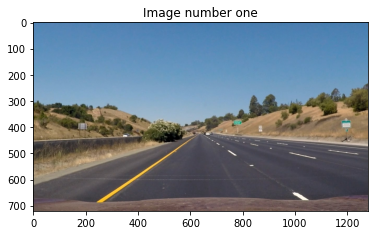

In [3]:
# Reading an image
images_paths = glob.glob("media/test_images/*.jpg")
images = [plt.imread(image) for image in images_paths]

# getting img dimensions and printing it
image_idx = 0

print("This image is of shape {}".format(images[image_idx].shape))
show_image(images[image_idx], "Image number one")

In [4]:
### Apply gaussian blue to eliminate noise
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [5]:
### This function returns the prespective and inverse prespective matrix for a prespective transform
def perspectiveTransform(srcPoints, dstPoints):
    M = cv2.getPerspectiveTransform(srcPoints, dstPoints)
    Minv = cv2.getPerspectiveTransform(dstPoints, srcPoints)
    return M, Minv
    
### This function applies prespective transform to an image and returns the warped image
def warpPerspective(img, imgSize, M):
    return cv2.warpPerspective(img, M, imgSize, cv2.INTER_LINEAR)

## Start your pipeline Here

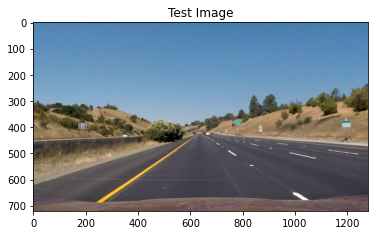

In [6]:
test_image = images[0]

show_image(test_image, "Test Image")

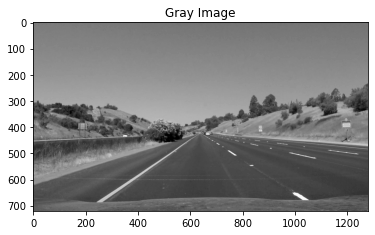

In [7]:
gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

show_image(gray, "Gray Image")

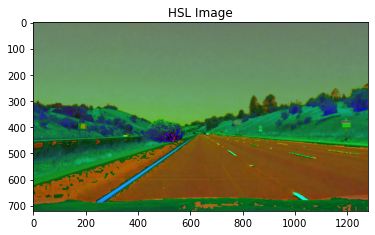

In [8]:
hls_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2HLS)

show_image(hls_image, "HSL Image")

In [9]:
h_channel = hls_image[:, :, 0]
l_channel = hls_image[:, :, 1]
s_channel = hls_image[:, :, 2]

In [10]:
np.max(h_channel), np.max(l_channel), np.max(s_channel)

(179, 254, 255)

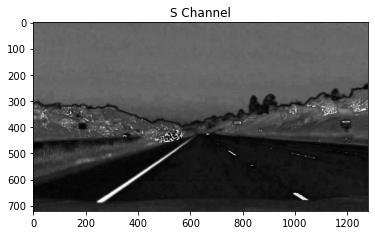

In [11]:
show_image(s_channel, "S Channel")

In [12]:
sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0)

show_image(sobelx, "Sobel X")

AttributeError: module 'cv2' has no attribute 'CV_8UI'

In [ ]:
np.max(sobelx), np.min(sobelx)

In [ ]:
abs_sobel_x = np.absolute(sobelx)
scaled_sobel = 255 * ((abs_sobel_x) / np.max(abs_sobel_x))

In [ ]:
show_image(scaled_sobel, "Enhanced Edges")

In [ ]:
sx_thresh = [10, 100]

sx_binary = np.zeros_like(scaled_sobel)
sx_binary[(scaled_sobel > sx_thresh[0]) & (scaled_sobel < sx_thresh[1])] = 1

In [ ]:
show_image(sx_binary, "Binary Image")

In [ ]:
srcPoints = np.array([[200, 700],
                      [580, 450],
                      [670, 450],
                      [1150, 700]]).astype(np.float32)

dstPoints = np.array([[200, 700],
                      [200, 50],
                      [1000, 50],
                      [1000, 700]]).astype(np.float32)

M, Minv = perspectiveTransform(srcPoints, dstPoints)

warped_image = warpPerspective(sx_binary, sx_binary.astype(np.float32).shape[1::-1], M)

In [ ]:
show_image(warped_image)

In [ ]:
origianl_image = warpPerspective(warped_image, sx_binary.shape[1::-1], Minv)
show_image(origianl_image)